In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<h3>TASK 1</h3>

In [2]:
wineData = np.load('winedata.npy')
wineLabel = np.load('winelabels.npy')

trainData, testData, trainLabels, testLabels = train_test_split(wineData, wineLabel, test_size=0.2)

In [3]:
scaler = StandardScaler()
X_trainTrans = scaler.fit_transform(trainData)
X_testTrans = scaler.transform(testData)

[LibSVM]Score:  1.0


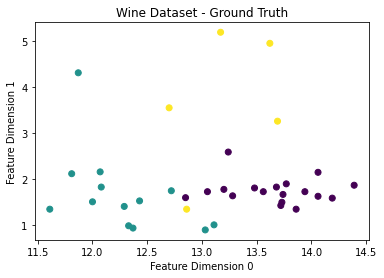

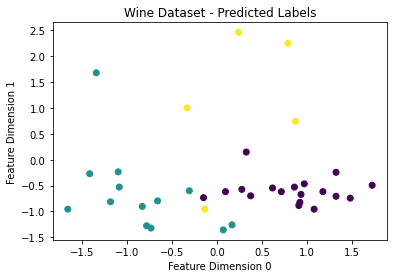

In [5]:
svc = SVC(verbose = True)
svc.fit(X_trainTrans,trainLabels)
print(f'Score:  {svc.score(X_testTrans,testLabels)}')

plt.scatter(testData[:, 0],testData[:, 1], marker ='o', c=testLabels)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title("Wine Dataset - Ground Truth")
plt.show()

plt.scatter(X_testTrans[:, 0],X_testTrans[:, 1], marker ='o', c=testLabels)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title("Wine Dataset - Predicted Labels")
plt.show()

<h3>TASK 2</h3>

In [12]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    #tf.keras.layers.Dense(100, activation=tf.nn.softmax)])
    tf.keras.layers.Dense(len(np.unique(trainLabels)), activation=tf.nn.softmax)])


model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(X_trainTrans, trainLabels, epochs=100, validation_split=0.2, verbose=1)
model.summary()

Epoch 1/100
4/4 [==============================] - 0s 27ms/step - loss: 1.2563 - sparse_categorical_accuracy: 0.1239 - val_loss: 1.2657 - val_sparse_categorical_accuracy: 0.2069
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2440 - sparse_categorical_accuracy: 0.1504 - val_loss: 1.2530 - val_sparse_categorical_accuracy: 0.2069
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2328 - sparse_categorical_accuracy: 0.1593 - val_loss: 1.2422 - val_sparse_categorical_accuracy: 0.2069
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2232 - sparse_categorical_accuracy: 0.1593 - val_loss: 1.2323 - val_sparse_categorical_accuracy: 0.2069
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2137 - sparse_categorical_accuracy: 0.1681 - val_loss: 1.2230 - val_sparse_categorical_accuracy: 0.2069
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2052 - sparse_categorical_accuracy: 0.168

In [13]:
results = model.evaluate(X_testTrans, testLabels)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 1ms/step - loss: 0.5833 - sparse_categorical_accuracy: 0.9444
Test set loss: 0.58, test set accuracy: 94.44%


NameError: name 'predictLabels' is not defined

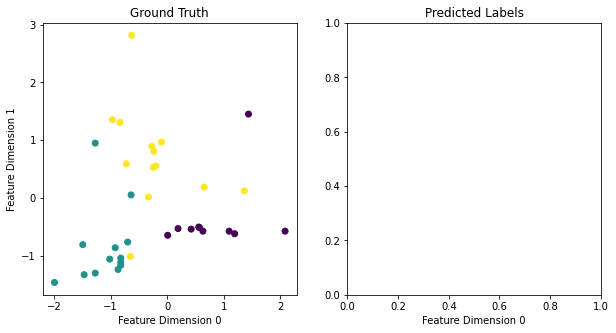

In [14]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(X_testTrans[:,0], X_testTrans[:,1], c=testLabels)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(X_testTrans[:,0], X_testTrans[:,1], c=np.argmax(predictLabels, axis=1))
plt.show()

In [ ]:
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()


In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

<h3>TASK 3</h3>

In [7]:
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.mnist.load_data()

print(f'MNIST sample shape: {xTrain.shape[1:]}')
print(f'Number of training samples: {xTrain.shape[0]}')
print(f'Number of testing samples: {xTest.shape[0]}')
print(f'Number of classes: {yTrain.shape}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: (60000,)


In [ ]:
xTrain = np.reshape(xTrain,(60000,784))
xTest = np.reshape(xTest,(10000,784))
xTrain = xTrain/255
xTest = xTest/255

model2 = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    #tf.keras.layers.Dense(100, activation=tf.nn.softmax)])
    tf.keras.layers.Dense(len(np.unique(yTest)), activation=tf.nn.softmax)])
    
model2.compile(optimizer = tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = tf.keras.metrics.SparseCategoricalAccuracy())

history2 = model2.fit(xTrain, yTrain, epochs=100, validation_split=0.2, verbose=1)                                                       

In [15]:
results = model2.evaluate(xTest, yTest)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')   

NameError: name 'model2' is not defined

NameError: name 'history2' is not defined

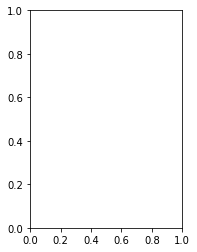

In [16]:
plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history2.history['sparse_categorical_accuracy'])
plt.plot(history2.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

<h3>TASK 4</h3>

In [30]:
(xTrainOrg, yTrainOrg), (xTestOrg, yTestOrg) = tf.keras.datasets.mnist.load_data()

print(f'MNIST sample shape: {xTrainOrg.shape}')
print(f'Number of training samples: {xTrainOrg.shape[0]}')
print(f'Number of testing samples: {xTestOrg.shape[0]}')
print(f'Number of classes: {len(np.unique(yTrainOrg))}')

MNIST sample shape: (60000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


In [31]:
# xTrainOrg = np.expand_dims(xTrainOrg, axis =3)
# xTestOrg = np.expand_dims(xTestOrg, axis =3)

xTrainOrg = xTrainOrg.astype('float32')
xTestOrg = xTestOrg.astype('float32')

xTrainOrg = xTrainOrg/255
xTestOrg = xTestOrg/255

xTestOrg.shape

(10000, 28, 28)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model3 = Sequential()
model3.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation=tf.nn.relu))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation=tf.nn.softmax))

In [20]:
model3.compile(optimizer = tf.keras.optimizers.SGD(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = tf.keras.metrics.SparseCategoricalAccuracy())

#model2.compile(optimizer = tf.keras.optimizers.SGD(),
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             #metrics = tf.keras.metrics.SparseCategoricalAccuracy())

history3 = model3.fit(xTrainOrg,yTrainOrg, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5619 - sparse_categorical_accuracy: 0.8411 - val_loss: 0.2504 - val_sparse_categorical_accuracy: 0.9279
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2554 - sparse_categorical_accuracy: 0.9236 - val_loss: 0.1794 - val_sparse_categorical_accuracy: 0.9481
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2010 - sparse_categorical_accuracy: 0.9400 - val_loss: 0.1517 - val_sparse_categorical_accuracy: 0.9574
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1704 - sparse_categorical_accuracy: 0.9486 - val_loss: 0.1376 - val_sparse_categorical_accuracy: 0.9599
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1532 - sparse_categorical_accuracy: 0.9545 - val_loss: 0.1224 - val_sparse_categorical_accuracy: 0.9640
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1363 - spa

In [21]:
results3 = model3.evaluate(xTestOrg, yTestOrg)
print(f'Test set loss: {results3[0]:0.2f}, test set accuracy: {results3[1]*100:0.2f}%')   

313/313 [==============================] - 1s 2ms/step - loss: 0.0855 - sparse_categorical_accuracy: 0.9740
Test set loss: 0.09, test set accuracy: 97.40%


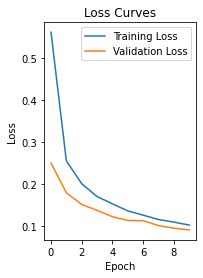

Text(0.5, 1.0, 'Accuracy Curves')

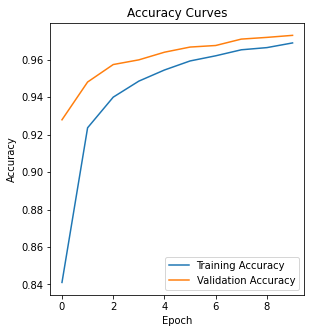

In [22]:
plt.subplot(122)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history3.history['sparse_categorical_accuracy'])
plt.plot(history3.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

In [23]:
import numpy as np
 
arr = np.array([11,22,33,44])
arr_2d = np.array([[90,20],[76,45],[44,87],[73,81]])
 
#printing the numpy array
print("The Numpy Array is : ")
for i in arr:
    print(i, end = ' ')
 
#printing the numpy 2D-Array
print("\nThe Numpy 2D-Array is:")
for i in arr_2d:
    print(i[0])
   
    


The Numpy Array is : 
11 22 33 44 
The Numpy 2D-Array is:
90
76
44
73
